#                                  **TWITTER SENTIMENT ANALYSIS**

## Models used 

#### - LOGISTIC REGRESSION
#### - NAIVE BAYES CLASSIFIER 
#### - ANN 
#### - GRADIENT BOOSTING 
#### - DECISION TREES CLASSIFIER
#### - RANDOM FOREST CLASSIFIER

## Data preprocessing involves 

#### - TOKENISING 
#### - STEMMING
#### - REGEX

### Also, approaches like **BAG OF WORDS** and **TF-IDF** have been used

### **WORDCLOUD** has been used for data Visualization



In [1]:
#Importing the required libraries

import pandas as pd
import csv
import sklearn
import re
import numpy as np
import nltk

In [2]:
#Importing the dataset and labeling the columns

data_train = pd.read_csv(r'C:\Users\Kartikay Chadha\Desktop\train.csv',engine='python',quoting=csv.QUOTE_NONE,sep='delimiter',error_bad_lines=False)

df = data_train
print(df)


                                 Sentiment,SentimentText
0      0,                     is so sad for my APL fr...
1      0,                   I missed the New Moon tra...
2                1,              omg its already 7:30 :O
3      0,          .. Omgaga. Im sooo  im gunna CRy. ...
4      0,         i think mi bf is cheating on me!!! ...
5                   0,         or i just worry too much?
6            1,       Juuuuuuuuuuuuuuuuussssst Chillin!!
7      0,       Sunny Again        Work Tomorrow  :-|...
8      1,      handed in my uniform today . i miss yo...
9       1,      hmmmm.... i wonder how she my number @-)
10                 0,      I must think about positive..
11     1,      thanks to all the haters up in my face...
12                0,      this weekend has sucked so far
13         0,     jb isnt showing in australia any more!
14                           0,     ok thats it you win.
15     0,    &lt;-------- This is the way i feel righ...
16     0,"    awhhe man.... I'm

In [3]:

listsen = {'sentiment':[], 'sentimentText':[]}
for i in df['Sentiment,SentimentText']:
    sent = i[0]
    text = i[2:]
    listsen['sentiment'].append(sent)
    listsen['sentimentText'].append(text)
listsen
df1 = pd.DataFrame(listsen) 
  
print(df1) 

frames = [df1, df]

result = pd.concat(frames, axis=1)
df2 = result.drop('Sentiment,SentimentText', axis=1)

df2

#SENTIMENT value 0 - The tweet's sentiment is negative
#SENTIMENT value 1 - The tweet's sentiment is positive

      sentiment                                      sentimentText
0             0                       is so sad for my APL frie...
1             0                     I missed the New Moon trail...
2             1                            omg its already 7:30 :O
3             0            .. Omgaga. Im sooo  im gunna CRy. I'...
4             0           i think mi bf is cheating on me!!!   ...
5             0                          or i just worry too much?
6             1                 Juuuuuuuuuuuuuuuuussssst Chillin!!
7             0         Sunny Again        Work Tomorrow  :-|  ...
8             1        handed in my uniform today . i miss you ...
9             1           hmmmm.... i wonder how she my number @-)
10            0                      I must think about positive..
11            1        thanks to all the haters up in my face a...
12            0                     this weekend has sucked so far
13            0             jb isnt showing in australia any m

,sentiment,sentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| ...
8,1,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-)


In [4]:
#removing handles (@) and using vectorization instead of loops to save time

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

# remove twitter handles (@user)
df2['tidy_tweet'] = np.vectorize(remove_pattern)(df2['sentimentText'], "@[\w]*")

df2

,sentiment,sentimentText,tidy_tweet
0,0,is so sad for my APL frie...,is so sad for my APL frie...
1,0,I missed the New Moon trail...,I missed the New Moon trail...
2,1,omg its already 7:30 :O,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| ...,Sunny Again Work Tomorrow :-| ...
8,1,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number -)


In [5]:
# remove special characters, numbers, punctuations
df2['tidy_tweet'] = df2['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


for i in range(len(df2.index)):
    df2['tidy_tweet'][i] = re.sub(r'\b\w{1,2}\b', '', df2['tidy_tweet'][i])
    df2['tidy_tweet'][i] = re.sub(r'\s\s+', ' ', df2['tidy_tweet'][i])
    df2['tidy_tweet'][i] = df2['tidy_tweet'][i].lstrip(' ') 

df2
temp = df2

In [6]:
#Performing tokenization , stemming 

tokenized_tweet = df2['tidy_tweet'].apply(lambda x: x.split())

from nltk.stem.porter import *
from nltk.corpus import stopwords
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])        # stemming

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df2['tidy_tweet'] = tokenized_tweet

for i in range(len(df2.index)):
    tweet = df2['tidy_tweet'][i] 
    tweet = tweet.split()
    tweet = [stemmer.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    df2['tidy_tweet'][i] = tweet

df2.sentiment = pd.to_numeric(df2.sentiment)
df2

,sentiment,sentimentText,tidy_tweet
0,0,is so sad for my APL frie...,sad apl friend
1,0,I missed the New Moon trail...,miss new moon trailer
2,1,omg its already 7:30 :O,omg alreadi
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cri thi dentist sinc wa supo...
4,0,i think mi bf is cheating on me!!! ...,think cheat
5,0,or i just worry too much?,worri much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,0,Sunny Again Work Tomorrow :-| ...,sunni work tomorrow tonight
8,1,handed in my uniform today . i miss you ...,hand uniform today miss alreadi
9,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number


In [7]:
#Using wordcloud for visualization
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#This shows the most frequent words in the complete dataset
all_words = ' '.join([text for text in temp['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

df3 = temp[temp.sentiment != 1]
df4 = temp[temp.sentiment != 0]


#This shows most frequent words used for describing sentiment 0
z =' '.join([text for text in df3['tidy_tweet']])

wordcloud0 = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(z)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud0, interpolation="bilinear")
plt.axis('off')
plt.show()

#This shows most frequent words used for describing sentiment 1
one = ' '.join([text for text in df4['tidy_tweet']])

wordcloud1 = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(one)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis('off')
plt.show()



<Figure size 1000x700 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

<Figure size 1000x700 with 1 Axes>

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# BAG-OF-WORDS feature matrix
bow = bow_vectorizer.fit_transform(df2['tidy_tweet']).toarray()


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df2['tidy_tweet']).toarray()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Y = df2.iloc[:,0].values

#Splitting the dataset

X_train_bow,X_test_bow,Y_train,Y_test = train_test_split(bow,Y,test_size = 0.20,random_state = 1)
X_train_tfidf,X_test_tfidf,Y_train,Y_test = train_test_split(tfidf,Y,test_size = 0.20,random_state = 1)

In [11]:
# LOGISTIC REG. BOW


classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train_bow,Y_train)

C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
Y_pred_LR_bow = classifier.predict(X_test_bow)

#Confusion matrix , precision,recall , accuracy,f1 score
cm_LR_bow = confusion_matrix(Y_test,Y_pred_LR_bow)
LR_accuracy_bow = (cm_LR_bow[0,0]+cm_LR_bow[1,1])/(cm_LR_bow[0,0]+cm_LR_bow[0,1]+cm_LR_bow[1,0]+cm_LR_bow[1,1])
LR_precision_bow = cm_LR_bow[1,1]/(cm_LR_bow[0,1]+cm_LR_bow[1,1])
LR_recall_bow = cm_LR_bow[1,1]/(cm_LR_bow[1,0]+cm_LR_bow[1,1])
LR_f1_score_bow = 2*(LR_precision_bow*LR_recall_bow)/(LR_precision_bow+LR_recall_bow)

In [13]:
# LOGISTIC REG. TF-IDF


classifier.fit(X_train_tfidf,Y_train)
Y_pred_LR_tfidf = classifier.predict(X_test_tfidf)

C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:

#Confusion matrix , precision,recall , accuracy,f1 score
cm_LR_tfidf = confusion_matrix(Y_test,Y_pred_LR_tfidf)
LR_precision_tfidf = cm_LR_tfidf[1,1]/(cm_LR_tfidf[0,1]+cm_LR_tfidf[1,1])
LR_recall_tfidf = cm_LR_tfidf[1,1]/(cm_LR_tfidf[1,0]+cm_LR_tfidf[1,1])
LR_f1_score_tfidf = 2*(LR_precision_tfidf*LR_recall_tfidf)/(LR_precision_tfidf+LR_recall_tfidf)
LR_accuracy_tfidf = (cm_LR_tfidf[0,0]+cm_LR_tfidf[1,1])/(cm_LR_tfidf[0,0]+cm_LR_tfidf[0,1]+cm_LR_tfidf[1,0]+cm_LR_tfidf[1,1])

In [15]:
#NAIVE-BAYES BOW

NBclassifier = GaussianNB()

NBclassifier.fit(X_train_bow,Y_train)
Y_pred_NB_bow = NBclassifier.predict(X_test_bow)


In [16]:
#Confusion matrix , precision,recall , accuracy,f1 score
cm_NB_bow = confusion_matrix(Y_test,Y_pred_NB_bow)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_accuracy_bow = format(accuracy_score(Y_test, Y_pred_NB_bow))
nb_precision_bow = format(precision_score(Y_test, Y_pred_NB_bow, average=None))
nb_recall_bow = format(recall_score(Y_test, Y_pred_NB_bow,average=None))
nb_f1_score_bow = format(f1_score(Y_test, Y_pred_NB_bow,average=None))


C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
#NAIVE-BAYES TF-IDF

NBclassifier.fit(X_train_tfidf,Y_train)
Y_pred_NB_tfidf = NBclassifier.predict(X_test_tfidf)


In [18]:
#Confusion matrix , precision,recall , accuracy,f1 score
cm_NB_tfidf = confusion_matrix(Y_test,Y_pred_NB_tfidf)
nb_accuracy_tfidf = format(accuracy_score(Y_test, Y_pred_NB_tfidf))
nb_precision_tfidf = format(precision_score(Y_test, Y_pred_NB_tfidf, average=None))
nb_recall_tfidf = format(recall_score(Y_test, Y_pred_NB_tfidf,average=None))
nb_f1_score_tfidf = format(f1_score(Y_test, Y_pred_NB_tfidf,average=None))

C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [19]:
#NN-BOW

import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    precision = true_positives / (predicted_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#NN with 3 layers

classifierbow = Sequential()
classifierbow.add(Dense(activation="relu", input_dim=1000, units=500, kernel_initializer="uniform"))
classifierbow.add(Dense(activation="relu", units=250, kernel_initializer="uniform"))
classifierbow.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifierbow.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', recall, precision, f1])
hist = classifierbow.fit(X_train_bow, Y_train, batch_size = 32, epochs = 10)

y_pred_nn_bow = classifierbow.predict(X_test_bow)
nn_accuracy_bow = hist.history['acc']
nn_precision_bow = hist.history['recall']
nn_recall_bow = hist.history['precision']
nn_f1_score_bow = hist.history['f1']

Using TensorFlow backend.
W0907 11:53:13.718011 13764 deprecation_wrapper.py:119] From C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 11:53:13.730977 13764 deprecation_wrapper.py:119] From C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0907 11:53:13.732971 13764 deprecation_wrapper.py:119] From C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0907 11:53:13.759901 13764 deprecation_wrapper.py:119] From C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is depr

Epoch 1/10
80000/80000 [==============================] - 16s 199us/step - loss: 0.5481 - acc: 0.7176 - recall: 0.8132 - precision: 0.7234 - f1: 0.7596
Epoch 2/10
80000/80000 [==============================] - 17s 213us/step - loss: 0.5091 - acc: 0.7438 - recall: 0.8244 - precision: 0.7486 - f1: 0.7798
Epoch 3/10
80000/80000 [==============================] - 16s 202us/step - loss: 0.4404 - acc: 0.7846 - recall: 0.8510 - precision: 0.7860 - f1: 0.8129
Epoch 4/10
80000/80000 [==============================] - 16s 197us/step - loss: 0.3179 - acc: 0.8472 - recall: 0.8910 - precision: 0.8469 - f1: 0.8647
Epoch 5/10
80000/80000 [==============================] - 16s 198us/step - loss: 0.2181 - acc: 0.8929 - recall: 0.9262 - precision: 0.8902 - f1: 0.9051
Epoch 6/10
80000/80000 [==============================] - 16s 202us/step - loss: 0.1705 - acc: 0.9145 - recall: 0.9434 - precision: 0.9096 - f1: 0.9239
Epoch 7/10
80000/80000 [==============================] - 16s 201us/step - loss: 0.1475 

In [20]:
#NN-TF-IDF

classifiertf = Sequential()
classifiertf.add(Dense(activation="relu", input_dim=1000, units=500, kernel_initializer="uniform"))
classifiertf.add(Dense(activation="relu", units=250, kernel_initializer="uniform"))
classifiertf.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifiertf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', recall, precision, f1])
hist1 = classifiertf.fit(X_train_tfidf, Y_train, batch_size = 32, epochs = 10)

y_pred_nn_tfidf = classifiertf.predict(X_test_tfidf)
nn_accuracy_tfidf = hist1.history['acc']
nn_precision_tfidf = hist1.history['recall']
nn_recall_tfidf = hist1.history['precision']
nn_f1_score_tfidf = hist1.history['f1']

Epoch 1/10
80000/80000 [==============================] - 17s 218us/step - loss: 0.5449 - acc: 0.7164 - recall: 0.8076 - precision: 0.7263 - f1: 0.7576
Epoch 2/10
80000/80000 [==============================] - 16s 198us/step - loss: 0.5156 - acc: 0.7399 - recall: 0.8237 - precision: 0.7433 - f1: 0.7767
Epoch 3/10
80000/80000 [==============================] - 16s 197us/step - loss: 0.4759 - acc: 0.7654 - recall: 0.8388 - precision: 0.7681 - f1: 0.7971
Epoch 4/10
80000/80000 [==============================] - 16s 200us/step - loss: 0.3763 - acc: 0.8223 - recall: 0.8741 - precision: 0.8233 - f1: 0.8441
Epoch 5/10
80000/80000 [==============================] - 16s 201us/step - loss: 0.2558 - acc: 0.8764 - recall: 0.9187 - precision: 0.8708 - f1: 0.8910
Epoch 6/10
80000/80000 [==============================] - 16s 197us/step - loss: 0.1858 - acc: 0.9056 - recall: 0.9443 - precision: 0.8954 - f1: 0.9168
Epoch 7/10
80000/80000 [==============================] - 16s 199us/step - loss: 0.1554 

In [21]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()

In [23]:
#BOW

gbk.fit(X_train_bow, Y_train)
Y_pred_gbk_bow = gbk.predict(X_test_bow)
cm_gbk_bow = confusion_matrix(Y_test,Y_pred_gbk_bow)
gbk_accuracy_bow = (cm_gbk_bow[0,0]+cm_gbk_bow[1,1])/(cm_gbk_bow[0,0]+cm_gbk_bow[0,1]+cm_gbk_bow[1,0]+cm_gbk_bow[1,1])
gbk_precision_bow = cm_gbk_bow[1,1]/(cm_gbk_bow[0,1]+cm_gbk_bow[1,1])
gbk_recall_bow = cm_gbk_bow[1,1]/(cm_gbk_bow[1,0]+cm_gbk_bow[1,1])
gbk_f1_score_bow = 2*(gbk_precision_bow*gbk_recall_bow)/(gbk_precision_bow+gbk_recall_bow)

In [24]:
#TF-IDF

gbk.fit(X_train_tfidf, Y_train)
Y_pred_gbk_tfidf = gbk.predict(X_test_tfidf)
cm_gbk_tfidf = confusion_matrix(Y_test,Y_pred_gbk_tfidf)
gbk_accuracy_tfidf = (cm_gbk_tfidf[0,0]+cm_gbk_tfidf[1,1])/(cm_gbk_tfidf[0,0]+cm_gbk_tfidf[0,1]+cm_gbk_tfidf[1,0]+cm_gbk_tfidf[1,1])
gbk_precision_tfidf = cm_gbk_tfidf[1,1]/(cm_gbk_tfidf[0,1]+cm_gbk_tfidf[1,1])
gbk_recall_tfidf = cm_gbk_tfidf[1,1]/(cm_gbk_tfidf[1,0]+cm_gbk_tfidf[1,1])
gbk_f1_score_tfidf = 2*(gbk_precision_tfidf*gbk_recall_tfidf)/(gbk_precision_tfidf+gbk_recall_tfidf)

In [25]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()

In [26]:
#BOW

decisiontree.fit(X_train_bow, Y_train)
Y_pred_decisiontree_bow = decisiontree.predict(X_test_bow)
cm_decisiontree_bow = confusion_matrix(Y_test,Y_pred_decisiontree_bow)
decisiontree_accuracy_bow = (cm_decisiontree_bow[0,0]+cm_decisiontree_bow[1,1])/(cm_decisiontree_bow[0,0]+cm_decisiontree_bow[0,1]+cm_decisiontree_bow[1,0]+cm_decisiontree_bow[1,1])
decisiontree_precision_bow = cm_decisiontree_bow[1,1]/(cm_decisiontree_bow[0,1]+cm_decisiontree_bow[1,1])
decisiontree_recall_bow = cm_decisiontree_bow[1,1]/(cm_decisiontree_bow[1,0]+cm_decisiontree_bow[1,1])
decisiontree_f1_score_bow = 2*(decisiontree_precision_bow*decisiontree_recall_bow)/(decisiontree_precision_bow+decisiontree_recall_bow)

In [27]:
#TF-IDF

decisiontree.fit(X_train_tfidf, Y_train)
Y_pred_decisiontree_tfidf = decisiontree.predict(X_test_tfidf)
cm_decisiontree_tfidf = confusion_matrix(Y_test,Y_pred_decisiontree_tfidf)
decisiontree_accuracy_tfidf = (cm_decisiontree_tfidf[0,0]+cm_decisiontree_tfidf[1,1])/(cm_decisiontree_tfidf[0,0]+cm_decisiontree_tfidf[0,1]+cm_decisiontree_tfidf[1,0]+cm_decisiontree_tfidf[1,1])
decisiontree_precision_tfidf = cm_decisiontree_tfidf[1,1]/(cm_decisiontree_tfidf[0,1]+cm_decisiontree_tfidf[1,1])
decisiontree_recall_tfidf = cm_decisiontree_tfidf[1,1]/(cm_decisiontree_tfidf[1,0]+cm_decisiontree_tfidf[1,1])
decisiontree_f1_score_tfidf = 2*(decisiontree_precision_tfidf*decisiontree_recall_tfidf)/(decisiontree_precision_tfidf+decisiontree_recall_tfidf)

In [28]:
#RANDOMFOREST

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
#BOW

rf.fit(X_train_bow, Y_train)
Y_pred_rf_bow = rf.predict(X_test_bow)
cm_rf_bow = confusion_matrix(Y_test,Y_pred_rf_bow)
rf_accuracy_bow = (cm_rf_bow[0,0]+cm_rf_bow[1,1])/(cm_rf_bow[0,0]+cm_rf_bow[0,1]+cm_rf_bow[1,0]+cm_rf_bow[1,1])
rf_precision_bow = cm_rf_bow[1,1]/(cm_rf_bow[0,1]+cm_rf_bow[1,1])
rf_recall_bow = cm_rf_bow[1,1]/(cm_rf_bow[1,0]+cm_rf_bow[1,1])
rf_f1_score_bow = 2*(rf_precision_bow*rf_recall_bow)/(rf_precision_bow+rf_recall_bow)

C:\Users\Kartikay Chadha\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
#TF-IDF

rf.fit(X_train_tfidf, Y_train)
Y_pred_rf_tfidf = rf.predict(X_test_tfidf)
cm_rf_tfidf = confusion_matrix(Y_test,Y_pred_rf_tfidf)
rf_accuracy_tfidf = (cm_rf_tfidf[0,0]+cm_rf_tfidf[1,1])/(cm_rf_tfidf[0,0]+cm_rf_tfidf[0,1]+cm_rf_tfidf[1,0]+cm_rf_tfidf[1,1])
rf_precision_tfidf = cm_rf_tfidf[1,1]/(cm_rf_tfidf[0,1]+cm_rf_tfidf[1,1])
rf_recall_tfidf = cm_rf_tfidf[1,1]/(cm_rf_tfidf[1,0]+cm_rf_tfidf[1,1])
rf_f1_score_tfidf = 2*(rf_precision_tfidf*rf_recall_tfidf)/(rf_precision_tfidf+rf_recall_tfidf)

In [31]:
#BOW Metrics

metrics_bow = [ (LR_accuracy_bow, LR_precision_bow, LR_recall_bow, LR_f1_score_bow) ,
                (nb_accuracy_bow, nb_precision_bow, nb_recall_bow, nb_f1_score_bow) ,
                (np.average(nn_accuracy_bow), np.average(nn_precision_bow), np.average(nn_recall_bow),np.average(nn_f1_score_bow)) ,
                (gbk_accuracy_bow, gbk_precision_bow, gbk_recall_bow, gbk_f1_score_bow) ,
                (decisiontree_accuracy_bow, decisiontree_precision_bow, decisiontree_recall_bow, decisiontree_f1_score_bow) ,
                (rf_accuracy_bow, rf_precision_bow, rf_recall_bow, rf_f1_score_bow) ]
               

dfObj_bow = pd.DataFrame(metrics_bow, columns = ['Accuracy' , 'Precision', 'Recall' , 'F1 Score'], 
                     index=['Logistic Regression', 'Naive-Bayes', 'ANN' , 'Gradient Booster' , 'Decision Tree' , 'Random Forest'])

In [32]:
#TF-IDF Metrics

metrics_tfidf = [ (LR_accuracy_tfidf, LR_precision_tfidf, LR_recall_tfidf, LR_f1_score_tfidf) ,
                (nb_accuracy_tfidf, nb_precision_tfidf, nb_recall_tfidf, nb_f1_score_tfidf) ,
                (np.average(nn_accuracy_tfidf), np.average(nn_precision_tfidf),nn_recall_tfidf, np.average(nn_f1_score_tfidf)) ,
                (gbk_accuracy_tfidf, gbk_precision_tfidf, gbk_recall_tfidf, gbk_f1_score_tfidf) ,
                (decisiontree_accuracy_tfidf, decisiontree_precision_tfidf, decisiontree_recall_tfidf, decisiontree_f1_score_tfidf) ,
                (rf_accuracy_tfidf, rf_precision_tfidf, rf_recall_tfidf, rf_f1_score_tfidf) ]
               

dfObj_tfidf = pd.DataFrame(metrics_tfidf, columns = ['Accuracy' , 'Precision', 'Recall' , 'F1 Score'], 
                     index=['Logistic Regression', 'Naive-Bayes', 'ANN' , 'Gradient Booster' , 'Decision Tree' , 'Random Forest'])

In [33]:
#Detailed table for Bag of Words Model

dfObj_bow

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.73155,0.728867,0.835296,0.778461
Naive-Bayes,0.65185,[0.65314057 0.72376004 0. 0. ],[0.61743425 0.67838484 0. 0. ],[0.63478569 0.70033824 0. 0. ]
ANN,0.862075,0.910041,0.857566,0.87983
Gradient Booster,0.696235,0.671443,0.904711,0.770815
Decision Tree,0.668233,0.705971,0.706784,0.706377
Random Forest,0.6997,0.726191,0.751527,0.738642


In [34]:
#Detailed Model for TF-IDF

dfObj_tfidf

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.73005,0.732633,0.821837,0.774676
Naive-Bayes,0.6459,[0.63303057 0.7359011 0. 0. ],[0.65636844 0.63782874 0. 0. ],[0.6444883 0.68336417 0. 0. ]
ANN,0.853784,0.90574,"[0.7263460783600807, 0.7433441260695457, 0.768...",0.872874
Gradient Booster,0.682207,0.655268,0.922674,0.766313
Decision Tree,0.671584,0.70341,0.723344,0.713238
Random Forest,0.70705,0.734103,0.75445,0.744137


In [ ]:
#There is an anomaly for ANN in tfidf thus not removing it

In [54]:
%matplotlib inline

In [55]:
import matplotlib.pyplot as plt

In [76]:
dfObj_bow.Accuracy = dfObj_bow.Accuracy.astype(float)
dfObj_bow.Accuracy

Logistic Regression    0.731550
Naive-Bayes            0.651850
ANN                    0.862075
Gradient Booster       0.696235
Decision Tree          0.668233
Random Forest          0.699700
Name: Accuracy, dtype: float64

In [78]:
dfObj_tfidf.Accuracy = dfObj_tfidf.Accuracy.astype(float)
dfObj_tfidf.Accuracy

Logistic Regression    0.730050
Naive-Bayes            0.645900
ANN                    0.853784
Gradient Booster       0.682207
Decision Tree          0.671584
Random Forest          0.707050
Name: Accuracy, dtype: float64

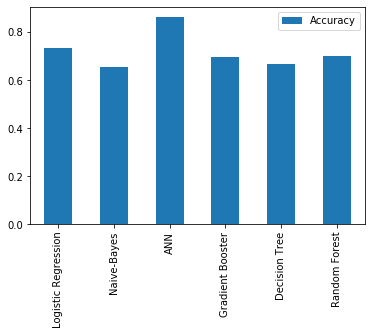

In [77]:
dfObj_bow.plot(kind='bar',y='Accuracy')


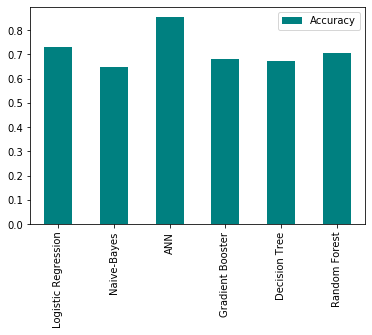

In [80]:
dfObj_tfidf.plot(kind='bar',y='Accuracy', color='teal')


In [83]:
metrics_accuracy = [ (LR_accuracy_tfidf, LR_accuracy_bow),
                     (nb_accuracy_tfidf, nb_accuracy_bow),
                     (np.average(nn_accuracy_tfidf), np.average(nn_accuracy_bow)),
                      (gbk_accuracy_tfidf, gbk_accuracy_bow),
                    (decisiontree_accuracy_tfidf, decisiontree_accuracy_bow),
                    (rf_accuracy_tfidf, rf_accuracy_bow)]
                     
dfObj_accuracy = pd.DataFrame(metrics_accuracy, columns = ['BOW', 'TFIDF'], 
                     index=['Logistic Regression', 'Naive-Bayes', 'ANN' , 'Gradient Booster' , 'Decision Tree' , 'Random Forest'])
dfObj_accuracy

,BOW,TFIDF
Logistic Regression,0.73005,0.73155
Naive-Bayes,0.6459,0.65185
ANN,0.853784,0.862075
Gradient Booster,0.682207,0.696235
Decision Tree,0.671584,0.668233
Random Forest,0.70705,0.6997


In [87]:
dfObj_accuracy = dfObj_accuracy.astype(float)
dfObj_accuracy.BOW

Logistic Regression    0.730050
Naive-Bayes            0.645900
ANN                    0.853784
Gradient Booster       0.682207
Decision Tree          0.671584
Random Forest          0.707050
Name: BOW, dtype: float64

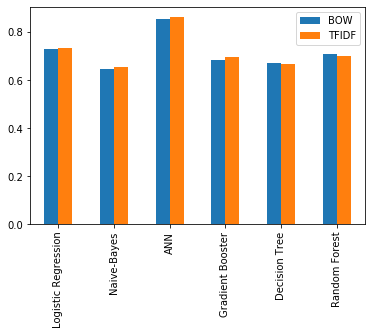

In [89]:
dfObj_accuracy.plot(kind='bar')